In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
qb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /QB Player Stats.csv')
wr = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /WR Player Stats.csv')
rb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /RB Player Stats.csv')

In [ ]:
qb.drop(columns=['Unnamed: 32'], inplace=True)
qb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%',
       'NY/A', 'ANY/A', '4QC', 'GWD'],
      dtype='object')

In [ ]:
qb.rename(columns={'Yds.1': 'SkYds'}, inplace=True)
rb.head()

,Rk,Player,Age,Team,Pos,G,GS,Att,Yds,TD,1D,Succ%,Lng,Y/A,Y/G,A/G
0,2023,Derrick Henry,29,TEN,RB,17,17,280,1167,12,63,46.1,69.0,4.2,68.6,16.5
1,2023,Christian McCaffrey,27,SFO,RB,16,16,272,1459,14,83,54.0,72.0,5.4,91.2,17.0
2,2023,Rachaad White,24,TAM,RB,17,17,272,990,6,46,40.8,38.0,3.6,58.2,16.0
3,2023,Travis Etienne,24,JAX,RB,17,17,267,1008,11,53,43.1,62.0,3.8,59.3,15.7
4,2023,Joe Mixon,27,CIN,RB,17,17,257,1034,9,59,49.4,44.0,4.0,60.8,15.1


In [ ]:
rb.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
       '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'A/G'],
      dtype='object')

In [ ]:
rb.rename(columns={'Rk': 'Year'}, inplace=True)
rb.head()

,Year,Player,Age,Team,Pos,G,GS,Att,Yds,TD,1D,Succ%,Lng,Y/A,Y/G,A/G
0,2023,Derrick Henry,29,TEN,RB,17,17,280,1167,12,63,46.1,69.0,4.2,68.6,16.5
1,2023,Christian McCaffrey,27,SFO,RB,16,16,272,1459,14,83,54.0,72.0,5.4,91.2,17.0
2,2023,Rachaad White,24,TAM,RB,17,17,272,990,6,46,40.8,38.0,3.6,58.2,16.0
3,2023,Travis Etienne,24,JAX,RB,17,17,267,1008,11,53,43.1,62.0,3.8,59.3,15.7
4,2023,Joe Mixon,27,CIN,RB,17,17,257,1034,9,59,49.4,44.0,4.0,60.8,15.1


In [ ]:
wr.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb'],
      dtype='object')

Add Rushing Stats to QB

In [ ]:
rb_qb_rushing = rb[rb['Pos'] == 'QB'].copy()

In [ ]:
rb_qb_rushing.rename(columns={
    'Att': 'RushAtt',
    'Yds': 'RushYds',
    'TD': 'RushTD',
    '1D': 'Rush1D',
    'Succ%': 'RushSucc%',
    'Lng': 'RushLng',
    'Y/A': 'RushY/A',
    'Y/G': 'RushY/G',
    'A/G': 'RushA/G'
}, inplace=True)

In [ ]:
rb_qb_rushing = rb_qb_rushing[['Player', 'Year', 'RushAtt', 'RushYds', 'RushTD',
                               'Rush1D', 'RushSucc%', 'RushLng', 'RushY/A', 'RushY/G', 'RushA/G']]

In [ ]:
qb = qb.merge(rb_qb_rushing, on=['Player', 'Year'], how='left')

In [ ]:
qb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'SkYds', 'Sk%',
       'NY/A', 'ANY/A', '4QC', 'GWD', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D',
       'RushSucc%', 'RushLng', 'RushY/A', 'RushY/G', 'RushA/G'],
      dtype='object')

Add Rushing Stats to WR

In [ ]:
rb_wr_rushing = rb[rb['Pos'] == 'WR'].copy()

In [ ]:
rb_wr_rushing.rename(columns={
    'Att': 'RushAtt',
    'Yds': 'RushYds',
    'TD': 'RushTD',
    '1D': 'Rush1D',
    'Succ%': 'RushSucc%',
    'Lng': 'RushLng',
    'Y/A': 'RushY/A',
    'Y/G': 'RushY/G',
    'A/G': 'RushA/G'
}, inplace=True)

In [ ]:
rb_wr_rushing = rb_wr_rushing[['Player', 'Year', 'RushAtt', 'RushYds', 'RushTD',
                               'Rush1D', 'RushSucc%', 'RushLng', 'RushY/A', 'RushY/G', 'RushA/G']]

In [ ]:
wr = wr.merge(rb_wr_rushing, on=['Player', 'Year'], how='left')

In [ ]:
wr.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G'],
      dtype='object')

Add Receiving Stats to RB

In [ ]:
wr_rb_receiving = wr[wr['Pos'] == 'RB'].copy()

In [ ]:
wr_rb_receiving.rename(columns={
    'Tgt': 'RecTgt',
    'Rec': 'RecRec',
    'Yds': 'RecYds',
    'Y/R': 'RecY/R',
    'TD': 'RecTD',
    '1D': 'Rec1D',
    'Succ%': 'RecSucc%',
    'Lng': 'RecLng',
    'Y/G': 'RecY/G',
    'Ctch%': 'RecCtch%',
    'Y/Tgt': 'RecY/Tgt',
}, inplace=True)

In [ ]:
wr_rb_receiving = wr_rb_receiving[['Player', 'Year', 'RecTgt', 'RecRec', 'RecYds', 'RecY/R', 'RecTD',
                                   'Rec1D', 'RecSucc%', 'RecLng', 'RecY/G', 'RecCtch%', 'RecY/Tgt']]

In [ ]:
rb = rb.merge(wr_rb_receiving, on=['Player', 'Year'], how='left')

In [ ]:
rb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
       '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'A/G', 'RecTgt', 'RecRec', 'RecYds',
       'RecY/R', 'RecTD', 'Rec1D', 'RecSucc%', 'RecLng', 'RecY/G', 'RecCtch%',
       'RecY/Tgt'],
      dtype='object')

In [ ]:
qb = qb[qb['Pos'] == 'QB'].copy()
rb = rb[rb['Pos'] == 'RB'].copy()
wr = wr[wr['Pos'].isin(['WR', 'TE'])].copy()

Save Files

In [ ]:
qb.to_csv("qb_with_rushing.csv", index=False)
rb.to_csv("rb_filtered.csv", index=False)
wr.to_csv("wr_and_te_with_rushing.csv", index=False)

In [ ]:
from google.colab import files

files.download("qb_with_rushing.csv")
files.download("rb_filtered.csv")
files.download("wr_and_te_with_rushing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaning Columns

In [ ]:
qb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /qb_with_rushing.csv')
rb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /rb_filtered.csv')
wr = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /wr_and_te_with_rushing.csv')

In [ ]:
qb.drop(columns='QBrec', inplace=True)

In [ ]:
qb.drop(columns=['GWD', '4QC'], inplace=True)

Separate WR and TE

In [ ]:
wr_only = wr[wr['Pos'] == 'WR'].copy()
te_only = wr[wr['Pos'] == 'TE'].copy()

In [ ]:
wr_only.to_csv("wr_with_rushing.csv", index=False)
te_only.to_csv("te_with_rushing.csv", index=False)

In [ ]:
from google.colab import files

files.download("wr_with_rushing.csv")
files.download("te_with_rushing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
wr = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /wr_with_rushing.csv')
te = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /te_with_rushing.csv')

Create Defensive Team Metrics

In [ ]:
dypg = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /Opponent Yards per Game.csv')
dppg = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /Opponent Points per Game.csv')
dppp = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /Opponent Points per Play.csv')
dtop = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /Opponent Average Time of Possession.csv')
dplaypg = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /Opponent Plays per Game.csv')

Yards Per Game

In [ ]:
dypg.columns

Index(['Season', 'Rank', 'Team', 'Season Average', 'Last 3', 'Last 1', 'Home',
       'Away', 'Unnamed: 8'],
      dtype='object')

In [ ]:
dypg.drop(columns='Unnamed: 8', inplace=True)

In [ ]:
dypg.drop(columns=['Last 3', 'Last 1'], inplace=True)

In [ ]:
dypg.drop(columns='Rank', inplace=True)

In [ ]:
dypg.columns

Index(['Season', 'Team', 'Season Average', 'Home', 'Away'], dtype='object')

In [ ]:
dypg.rename(columns={
    'Season Average' : 'AvgYPG',
    'Home' : 'HomeYPG',
    'Away' : 'AwayYPG'
}, inplace=True)

Points Per Game

In [ ]:
dppg.columns

Index(['Season', 'Rank', 'Team', 'Season Average', 'Last 3', 'Last 1', 'Home',
       'Away'],
      dtype='object')

In [ ]:
dppg.drop(columns=['Last 3', 'Last 1', 'Rank'], inplace=True)

In [ ]:
dppg.columns

Index(['Season', 'Team', 'Season Average', 'Home', 'Away'], dtype='object')

In [ ]:
dppg.rename(columns={
    'Season Average' : 'AvgPPG',
    'Home' : 'HomePPG',
    'Away' : 'AwayPPG'
}, inplace=True)

Points Per Play

In [ ]:
dppp.columns

Index(['Season', 'Rank', 'Team', 'Season Average', 'Last 3', 'Last 1', 'Home',
       'Away', '2023'],
      dtype='object')

In [ ]:
dppp.drop(columns=['Last 3', 'Last 1', 'Rank'], inplace=True)

In [ ]:
dppp.drop(columns='2023', inplace=True)

In [ ]:
dppp.columns

Index(['Season', 'Team', 'Season Average', 'Home', 'Away'], dtype='object')

In [ ]:
dppp.rename(columns={
    'Season Average' : 'AvgPPP',
    'Home' : 'HomePPP',
    'Away' : 'AwayPPP'
}, inplace=True)

Time of Posession

In [ ]:
dtop.columns

Index(['Season', 'Rank', 'Team', 'Season Average', 'Last 3', 'Last 1', 'Home',
       'Away', 'Unnamed: 8'],
      dtype='object')

In [ ]:
dtop.drop(columns=['Last 3', 'Last 1', 'Rank', 'Unnamed: 8'], inplace=True)

In [ ]:
dtop.columns

Index(['Season', 'Team', 'Season Average', 'Home', 'Away'], dtype='object')

In [ ]:
dtop.rename(columns={
    'Season Average' : 'AvgTOP',
    'Home' : 'HomeTOP',
    'Away' : 'AwayTOP'
}, inplace=True)

Plays Per Game

In [ ]:
dplaypg.columns

Index(['Season', 'Rank', 'Team', 'Season Average', 'Last 3', 'Last 1', 'Home',
       'Away'],
      dtype='object')

In [ ]:
dplaypg.drop(columns=['Last 3', 'Last 1', 'Rank'], inplace=True)

In [ ]:
dplaypg.columns

Index(['Season', 'Team', 'Season Average', 'Home', 'Away'], dtype='object')

In [ ]:
dplaypg.rename(columns={
    'Season Average' : 'AvgPlaysPG',
    'Home' : 'HomePlaysPG',
    'Away' : 'AwayPlaysPG'
}, inplace=True)

In [ ]:
dypg_columns = dypg.columns
dppg_columns = dppg.columns
dppp_columns = dppp.columns
dtop_columns = dtop.columns
dplaypg_columns = dplaypg.columns

print("dypg columns: ", dypg_columns)
print("dppg columns: ", dppg_columns)
print("dppp columns: ", dppp_columns)
print("dtop columns: ", dtop_columns)
print("dplaypg columns: ", dplaypg_columns)

dypg columns:  Index(['Season', 'Team', 'AvgYPG', 'HomeYPG', 'AwayYPG'], dtype='object')
dppg columns:  Index(['Season', 'Team', 'AvgPPG', 'HomePPG', 'AwayPPG'], dtype='object')
dppp columns:  Index(['Season', 'Team', 'AvgPPP', 'HomePPP', 'AwayPPP'], dtype='object')
dtop columns:  Index(['Season', 'Team', 'AvgTOP', 'HomeTOP', 'AwayTOP'], dtype='object')
dplaypg columns:  Index(['Season', 'Team', 'AvgPlaysPG', 'HomePlaysPG', 'AwayPlaysPG'], dtype='object')


Create Master Defensive Metric CSV

In [ ]:
df_def = dypg.copy()

df_def = df_def.merge(dppg, on=['Season', 'Team'], how='left')
df_def = df_def.merge(dppp, on=['Season', 'Team'], how='left')
df_def = df_def.merge(dtop, on=['Season', 'Team'], how='left')
df_def = df_def.merge(dplaypg, on=['Season', 'Team'], how='left')

In [ ]:
df_def.to_csv("defensive_metrics.csv", index=False)

files.download("defensive_metrics.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
defense = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /defensive_metrics.csv')

In [ ]:
defense.drop(columns=['AvgTOP', 'HomeTOP', 'AwayTOP'], inplace=True)

In [ ]:
defense.columns

Index(['Season', 'Team', 'AvgYPG', 'HomeYPG', 'AwayYPG', 'AvgPPG', 'HomePPG',
       'AwayPPG', 'AvgPPP', 'HomePPP', 'AwayPPP', 'AvgPlaysPG', 'HomePlaysPG',
       'AwayPlaysPG'],
      dtype='object')

In [ ]:
from google.colab import files

defense.to_csv("defense_metrics_cleaned", index=False)

files.download("defense_metrics_cleaned")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Add Fantasy Stats

In [ ]:
wr_fantasy = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /WR Fantasy Stats.csv')
te_fantasy = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /TE Fantasy Stats.csv')
qb_fantasy = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /QB Fantasy Stats .csv')
rb_fantasy = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /RB Fantasy Stats.csv')

In [ ]:
wr_fantasy.columns
rb_fantasy.columns
te_fantasy.columns
qb_fantasy.columns

Index(['Year', 'NAME', 'TEAM', 'POS', 'FPTS/G', 'FPTS'], dtype='object')

In [ ]:
wr = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /wr_with_rushing.csv')
te = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /te_with_rushing.csv')
rb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /rb_filtered.csv')
qb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /qb_with_rushing.csv')

In [ ]:
wr.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G'],
      dtype='object')

In [ ]:
te.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G'],
      dtype='object')

In [ ]:
rb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
       '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'A/G', 'RecTgt', 'RecRec', 'RecYds',
       'RecY/R', 'RecTD', 'Rec1D', 'RecSucc%', 'RecLng', 'RecY/G', 'RecCtch%',
       'RecY/Tgt'],
      dtype='object')

In [ ]:
qb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'SkYds', 'Sk%',
       'NY/A', 'ANY/A', '4QC', 'GWD', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D',
       'RushSucc%', 'RushLng', 'RushY/A', 'RushY/G', 'RushA/G'],
      dtype='object')

In [ ]:
for df in [wr_fantasy, rb_fantasy, te_fantasy, qb_fantasy]:
  df.rename(columns={'NAME' : 'Player'}, inplace=True)

In [ ]:
wr_merged = pd.merge(wr, wr_fantasy, on=['Player', 'Year'], how='inner')

rb_merged = pd.merge(rb, rb_fantasy, on=['Player', 'Year'], how='inner')

te_merged = pd.merge(te, te_fantasy, on=['Player', 'Year'], how='inner')

qb_merged = pd.merge(qb, qb_fantasy, on=['Player', 'Year'], how='inner')

In [ ]:
wr_merged.to_csv("wr_merged.csv", index=False)
rb_merged.to_csv("rb_merged.csv", index=False)
te_merged.to_csv("te_merged.csv", index=False)
qb_merged.to_csv("qb_merged.csv", index=False)

In [ ]:
files.download("wr_merged.csv")
files.download("rb_merged.csv")
files.download("te_merged.csv")
files.download("qb_merged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Function to remove multiple player entries for one season
def keep_unique_season_totals(df):
    df_multi_team = df[df['Team'] == '2TM']

    df_multi_team = df_multi_team.drop_duplicates(subset=['Player', 'Year'])

    df_single_team = df[df['Team'] != '2TM']

    players_with_2tm = set(zip(df_multi_team['Player'], df_multi_team['Year']))
    df_single_team = df_single_team[~df_single_team[['Player', 'Year']].apply(tuple, axis=1).isin(players_with_2tm)]

    df_cleaned = pd.concat([df_single_team, df_multi_team], ignore_index=True)

    return df_cleaned

In [ ]:
wr_merged = keep_unique_season_totals(wr_merged)
rb_merged = keep_unique_season_totals(rb_merged)
te_merged = keep_unique_season_totals(te_merged)
qb_merged = keep_unique_season_totals(qb_merged)

In [ ]:
wr_merged.to_csv("wr_merged_cleaned.csv", index=False)
rb_merged.to_csv("rb_merged_cleaned.csv", index=False)
te_merged.to_csv("te_merged_cleaned.csv", index=False)
qb_merged.to_csv("qb_merged_cleaned.csv", index=False)

In [ ]:
files.download("wr_merged_cleaned.csv")
files.download("rb_merged_cleaned.csv")
files.download("te_merged_cleaned.csv")
files.download("qb_merged_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Final Cleanup

In [ ]:
wr = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /wr_merged_cleaned.csv')
rb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /rb_merged_cleaned.csv')
te = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /te_merged_cleaned.csv')
qb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /qb_merged_cleaned.csv')

In [ ]:
wr.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G', 'TEAM', 'POS', 'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
wr.drop(columns=['TEAM', 'POS'], inplace=True)

In [ ]:
rb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
       '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'A/G', 'RecTgt', 'RecRec', 'RecYds',
       'RecY/R', 'RecTD', 'Rec1D', 'RecSucc%', 'RecLng', 'RecY/G', 'RecCtch%',
       'RecY/Tgt', 'TEAM', 'POS', 'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
rb.drop(columns=['TEAM', 'POS'], inplace=True)

In [ ]:
te.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G', 'TEAM', 'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
te.drop(columns=['TEAM'], inplace=True)

In [ ]:
qb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'SkYds', 'Sk%',
       'NY/A', 'ANY/A', '4QC', 'GWD', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D',
       'RushSucc%', 'RushLng', 'RushY/A', 'RushY/G', 'RushA/G', 'TEAM', 'POS',
       'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
qb.drop(columns=['4QC', 'GWD', 'TEAM', 'POS'], inplace=True)

In [ ]:
wr.to_csv("wr_final.csv", index=False)
rb.to_csv("rb_final.csv", index=False)
te.to_csv("te_final.csv", index=False)
qb.to_csv("qb_final.csv", index=False)

In [ ]:
from google.colab import files

files.download("wr_final.csv")
files.download("rb_final.csv")
files.download("te_final.csv")
files.download("qb_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
qb.drop(columns='QBrec', inplace=True)

In [ ]:
qb.to_csv("qb_final.csv", index=False)
files.download("qb_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Initial Model Build

In [ ]:
wr.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G', 'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
# Create dataset where features come from year Y and target is FPTS/G from year Y+1
wr_prev = wr.copy()
wr_prev["Year"] = wr_prev["Year"] + 1  # Shift features forward

wr_shifted = pd.merge(
    wr[["Year", "Player", "FPTS/G"]],
    wr_prev[["Year", "Player"] + features],
    on=["Year", "Player"]
).dropna()

In [ ]:
wr_shifted.head()

,Year,Player,FPTS/G,Age,GS,G,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Fmb,RushAtt,RushYds,RushTD,RushY/A,RushY/G,RushA/G
0,2024,Ja'Marr Chase,23.7,23,16,16,145,100,1216,12.2,7,76.0,69.0,1,3.0,-6.0,0.0,-2.0,-0.4,0.2
1,2024,Amon-Ra St. Brown,18.6,24,16,16,164,119,1515,12.7,10,94.7,72.6,1,4.0,24.0,0.0,6.0,1.5,0.3
2,2024,Justin Jefferson,18.7,24,9,10,100,68,1074,15.8,5,107.4,68.0,1,1.0,-12.0,0.0,-12.0,-1.2,0.1
3,2024,CeeDee Lamb,17.6,24,17,17,181,135,1749,13.0,12,102.9,74.6,3,14.0,113.0,2.0,8.1,6.6,0.8
4,2024,Garrett Wilson,14.8,23,17,17,168,95,1042,11.0,3,61.3,56.5,2,4.0,0.0,0.0,0.0,0.0,0.2


In [ ]:
wr_shifted.to_csv("wr_shifted.csv", index=False)

In [ ]:
from google.colab import files

files.download("wr_shifted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
wr_shifted.columns

Index(['Year', 'Player', 'FPTS/G', 'Age', 'GS', 'G', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', 'Y/G', 'Ctch%', 'Fmb', 'RushAtt', 'RushYds', 'RushTD',
       'RushY/A', 'RushY/G', 'RushA/G'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = [ 'Age', 'GS', 'G', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Y/G', 'Ctch%', 'Fmb', 'RushAtt', 'RushYds', 'RushTD', 'RushY/A', 'RushY/G', 'RushA/G' ]

target = 'FPTS/G'

In [ ]:
wr_train_data = wr_shifted[wr_shifted["Year"] < 2024]
wr_test_data = wr_shifted[wr_shifted["Year"] == 2024]

X_train = wr_train_data[features]
y_train = wr_train_data[target]

X_test = wr_test_data[features]
y_test = wr_test_data[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

wr_test_data = wr_test_data.copy()
wr_test_data["Predicted_FPTS/G_2024"] = model.predict(X_test)

mae = mean_absolute_error(y_test, wr_test_data["Predicted_FPTS/G_2024"])
print(f"MAE on 2024 WRs using 2023 stats only: {mae:.2f} FPTS/G")

wr_test_data[["Player", "FPTS/G", "Predicted_FPTS/G_2024"]].sort_values(
    by="Predicted_FPTS/G_2024", ascending=False
).head(20)

MAE on 2024 WRs using 2023 stats only: 2.88 FPTS/G


,Player,FPTS/G,Predicted_FPTS/G_2024
3,CeeDee Lamb,17.6,21.843
11,Tyreek Hill,12.8,20.961
13,Puka Nacua,18.8,20.862
1,Amon-Ra St. Brown,18.6,20.360
19,Keenan Allen,12.3,18.700
23,A.J. Brown,16.7,18.501
15,Mike Evans,17.2,16.890
21,Nico Collins,17.6,16.687
0,Ja'Marr Chase,23.7,16.450
20,Michael Pittman Jr.,10.4,16.034


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Train XGBoost using the same training data
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict 2024 using XGBoost
wr_test_data = wr_test_data.copy()
wr_test_data["XGB_Predicted_FPTS/G_2024"] = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_mae = mean_absolute_error(y_test, wr_test_data["XGB_Predicted_FPTS/G_2024"])
print(f"XGBoost MAE on 2024 WRs: {xgb_mae:.2f} FPTS/G")

XGBoost MAE on 2024 WRs: 3.11 FPTS/G


Adding Season Lags

In [ ]:
def add_lag_features(df, columns_to_lag):
    df = df.copy()
    df["Player"] = df["Player"].str.strip()

    lagged = df[["Year", "Player"] + columns_to_lag].copy()
    lagged["Year"] = lagged["Year"] + 1
    lagged = lagged.rename(columns={c: f"{c}_lag1" for c in columns_to_lag})

    out = df.merge(lagged, on=["Year", "Player"], how="left")
    return out

In [ ]:
qb_columns_to_lag = ['Age', 'G', 'GS', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A',
       'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'SkYds', 'Sk%', 'NY/A', 'ANY/A',
       'RushAtt', 'RushYds', 'RushTD', 'Rush1D', 'RushSucc%', 'RushLng',
       'RushY/A', 'RushY/G', 'RushA/G', 'FPTS/G', 'FPTS']
qb_lagged = add_lag_features(qb, qb_columns_to_lag)
qb_lagged.to_csv("qb_lagged.csv", index=False)

In [ ]:
from google.colab import files

files.download("qb_lagged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rb.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD',
       '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'A/G', 'RecTgt', 'RecRec', 'RecYds',
       'RecY/R', 'RecTD', 'Rec1D', 'RecSucc%', 'RecLng', 'RecY/G', 'RecCtch%',
       'RecY/Tgt', 'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
rb_columns_to_lag = ['Age', 'Team', 'G', 'GS', 'Att', 'Yds', 'TD',
       '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'A/G', 'RecTgt', 'RecRec', 'RecYds',
       'RecY/R', 'RecTD', 'Rec1D', 'RecSucc%', 'RecLng', 'RecY/G', 'RecCtch%',
       'RecY/Tgt', 'FPTS/G', 'FPTS']
rb_lagged = add_lag_features(rb, rb_columns_to_lag)
rb_lagged.to_csv("rb_lagged.csv", index=False)

In [ ]:
files.download("rb_lagged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
te.columns

Index(['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'FPTS/G', 'FPTS'],
      dtype='object')

In [ ]:
te_columns_to_lag = ['Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
       'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt',
       'Fmb', 'FPTS/G', 'FPTS']
te_lagged = add_lag_features(te, te_columns_to_lag)
te_lagged.to_csv("te_lagged.csv", index=False)

In [ ]:
files.download("te_lagged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
wr_columns_to_lag = ['Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R',
                     'TD', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt', 'Fmb', 'RushAtt',
                     'RushYds', 'RushTD', 'RushY/A', 'RushY/G', 'RushA/G', 'FPTS/G', 'FPTS']
wr_lagged = add_lag_features(wr, wr_columns_to_lag)
wr_lagged.to_csv("wr_lagged.csv", index=False)

In [ ]:
files.download("wr_lagged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
wr = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /wr_lagged (2).csv')
rb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /rb_lagged (2).csv')
qb = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /qb_lagged (2).csv')
te = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /te_lagged (1).csv')

In [ ]:
wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Columns: 112 entries, Year to FPTS_lag3
dtypes: float64(93), int64(16), object(3)
memory usage: 320.4+ KB


EDA

In [ ]:
wr.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,366.0,2022.505464,1.119551,2021.0,2022.000,2023.00,2023.750,2024.0
Age,366.0,25.926230,3.055204,21.0,23.000,26.00,28.000,35.0
G,366.0,14.808743,2.636214,4.0,13.000,16.00,17.000,17.0
GS,366.0,10.934426,4.426083,0.0,8.000,11.50,15.000,17.0
Tgt,366.0,86.538251,37.281784,18.0,57.000,78.50,109.750,191.0
Rec,366.0,55.830601,26.044193,12.0,35.000,49.00,74.000,145.0
Yds,366.0,710.781421,339.959008,187.0,434.250,611.00,953.750,1947.0
Y/R,366.0,12.925683,2.456971,7.5,11.200,12.70,14.375,22.7
TD,366.0,4.404372,2.983127,0.0,2.000,4.00,6.000,17.0
1D,366.0,33.964481,16.422048,9.0,21.000,29.00,45.000,89.0


In [ ]:
rb.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,358.0,2022.508380,1.127048,2021.0,2021.250,2023.00,2024.000,2024.0
Age,358.0,25.486034,2.532384,20.0,24.000,25.00,27.000,33.0
G,358.0,13.854749,3.450509,2.0,12.000,15.00,17.000,17.0
GS,358.0,5.787709,5.891138,0.0,1.000,3.00,11.000,17.0
Att,358.0,118.681564,83.942386,4.0,47.000,95.50,188.000,349.0
Yds,358.0,515.684358,387.761988,20.0,183.000,411.00,800.750,2005.0
TD,358.0,3.717877,3.856133,0.0,1.000,2.00,5.000,18.0
1D,358.0,26.782123,20.137553,1.0,10.000,21.00,42.000,107.0
Succ%,358.0,48.477654,7.534611,20.8,44.025,48.40,53.100,75.0
Lng,358.0,33.829609,18.415574,7.0,20.000,29.50,44.000,92.0


In [ ]:
qb.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,289.0,2022.446367,1.088798,2021.0,2022.000,2022.00,2023.000,2024.0
Age,289.0,28.290657,4.526766,21.0,25.000,27.00,31.000,45.0
G,289.0,8.806228,5.607271,1.0,4.000,8.00,15.000,17.0
GS,289.0,7.335640,6.492635,0.0,1.000,5.00,14.000,17.0
Cmp,289.0,159.034602,143.303384,0.0,25.000,110.00,292.000,490.0
...,...,...,...,...,...,...,...,...
RushY/A_lag1_x,170.0,3.342353,2.245278,-1.2,1.850,3.50,4.900,14.0
RushY/G_lag1_x,170.0,13.014706,14.419024,-2.0,3.100,8.05,18.125,76.2
RushA/G_lag1_x,170.0,3.107647,2.299087,0.0,1.700,2.50,3.875,11.1
FPTS/G_lag1_x,170.0,11.789412,6.591684,-2.9,6.675,12.65,16.775,25.2


In [ ]:
te.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,359.0,2022.587744,1.094662,2021.0,2022.000,2023.00,2024.000,2024.0
Age,359.0,26.465181,3.104023,21.0,24.000,26.00,28.000,39.0
G,359.0,14.445682,3.282206,2.0,13.000,16.00,17.000,17.0
GS,359.0,7.874652,5.143027,0.0,3.000,8.00,12.000,17.0
Tgt,359.0,39.384401,33.573356,2.0,13.000,28.00,60.500,153.0
Rec,359.0,27.791086,23.956043,1.0,9.000,20.00,42.000,114.0
Yds,359.0,288.289694,266.665452,2.0,87.000,188.00,428.500,1361.0
Y/R,359.0,10.003621,2.763542,2.0,8.500,10.00,11.400,35.0
TD,359.0,1.988858,2.213440,0.0,0.000,1.00,3.000,12.0
1D,359.0,14.534819,13.811916,0.0,4.500,9.00,22.000,78.0


Shifts

In [ ]:
def create_shifted_dataset(df, features, target="FPTS/G"):
    df_prev = df.copy()
    df_prev["Year"] += 1

    df_shifted = pd.merge(
        df[["Year", "Player", target]],
        df_prev[["Year", "Player"] + features],
        on=["Year", "Player"],
        how="inner"
    )

    return df_shifted

In [ ]:
exclude_cols = ["Year", "Player", "Age", "FPTS/G", 'Team', 'Pos', "FPTS", 'Team_lag1_x']

wr_features = [col for col in wr.columns if col not in exclude_cols]
qb_features = [col for col in qb.columns if col not in exclude_cols]
rb_features = [col for col in rb.columns if col not in exclude_cols]
te_features = [col for col in te.columns if col not in exclude_cols]

wr_shifted = create_shifted_dataset(wr, wr_features)
qb_shifted = create_shifted_dataset(qb, qb_features)
rb_shifted = create_shifted_dataset(rb, rb_features)
te_shifted = create_shifted_dataset(te, te_features)

In [ ]:
from google.colab import files

In [ ]:
files.download("wr_shifted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("WR:", wr_shifted.shape)
print("QB:", qb_shifted.shape)
print("RB:", rb_shifted.shape)
print("TE:", te_shifted.shape)

WR: (188, 49)
QB: (170, 72)
RB: (190, 50)
TE: (206, 36)


EDA P2

In [ ]:
import matplotlib.pyplot as plt

def analyze_correlations(
    datasets: dict,
    target: str = "FPTS/G",
    top_n: int = 10,
    method: str = "pearson",
    min_non_na: float = 0.5,
    drop_constant: bool = True,
    plot: bool = True,
    figsize=(10, 6)
):

    results = {}

    for name, df in datasets.items():
        if target not in df.columns:
            print(f"[{name}] Skipping: target '{target}' not found.")
            continue

        # Keep numeric columns and target
        num_df = df.select_dtypes(include=[np.number]).copy()
        if target not in num_df.columns:
            if pd.api.types.is_numeric_dtype(df[target]):
                num_df[target] = df[target]
            else:
                print(f"[{name}] Target '{target}' is not numeric; skipping.")
                continue

        # Drop sparse and constant columns
        keep_cols = num_df.columns[num_df.notna().mean() >= min_non_na]
        num_df = num_df[keep_cols]
        if drop_constant:
            variances = num_df.var(numeric_only=True)
            const_cols = variances[variances == 0].index.tolist()
            num_df = num_df.drop(columns=const_cols, errors="ignore")

        # Need at least 2 columns to correlate
        if num_df.shape[1] < 2:
            print(f"[{name}] Not enough numeric columns after cleaning.")
            continue

        # Correlation matrix
        corr_mat = num_df.corr(method=method)

        # Top correlated features with target
        if target not in corr_mat.columns:
            print(f"[{name}] Target '{target}' missing from correlation matrix.")
            continue

        corr_to_target = corr_mat[target].drop(labels=[target]).dropna()
        top = (
            corr_to_target
            .to_frame("corr")
            .assign(abs_corr=lambda s: s["corr"].abs())
            .sort_values("abs_corr", ascending=False)
            .head(top_n)
            .reset_index()
            .rename(columns={"index": "feature"})
        )

        results[name] = {"corr_matrix": corr_mat, "top_corr": top}

        # Plotting
        if plot:
            plt.figure(figsize=figsize)
            cm = corr_mat.copy()
            if cm.shape[0] > 40:
                keep = set(top["feature"].tolist() + [target])
                cm = cm.loc[sorted(keep & set(cm.index)), sorted(keep & set(cm.columns))]
            im = plt.imshow(cm, aspect="auto", interpolation="nearest")
            plt.colorbar(im, fraction=0.046, pad=0.04)
            plt.title(f"[{name}] Correlation matrix ({method})")
            plt.xticks(range(cm.shape[1]), cm.columns, rotation=90)
            plt.yticks(range(cm.shape[0]), cm.index)
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(max(8, min(1.2*len(top), 16)), 5))
            plt.bar(top["feature"], top["corr"])
            plt.axhline(0, linewidth=1)
            plt.title(f"[{name}] Top {len(top)} features correlated with '{target}'")
            plt.xticks(rotation=60, ha="right")
            plt.ylabel(f"{method.capitalize()} correlation")
            plt.tight_layout()
            plt.show()

        print(f"\n[{name}] Top {len(top)} correlations with '{target}':")
        display_cols = ["feature", "corr", "abs_corr"]
        print(top[display_cols].to_string(index=False))

    return results

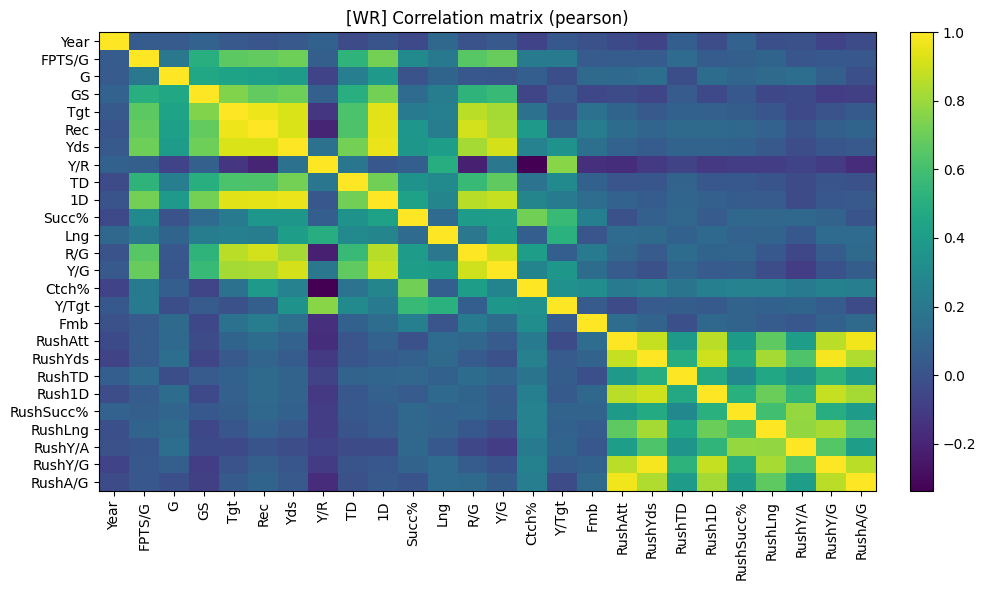

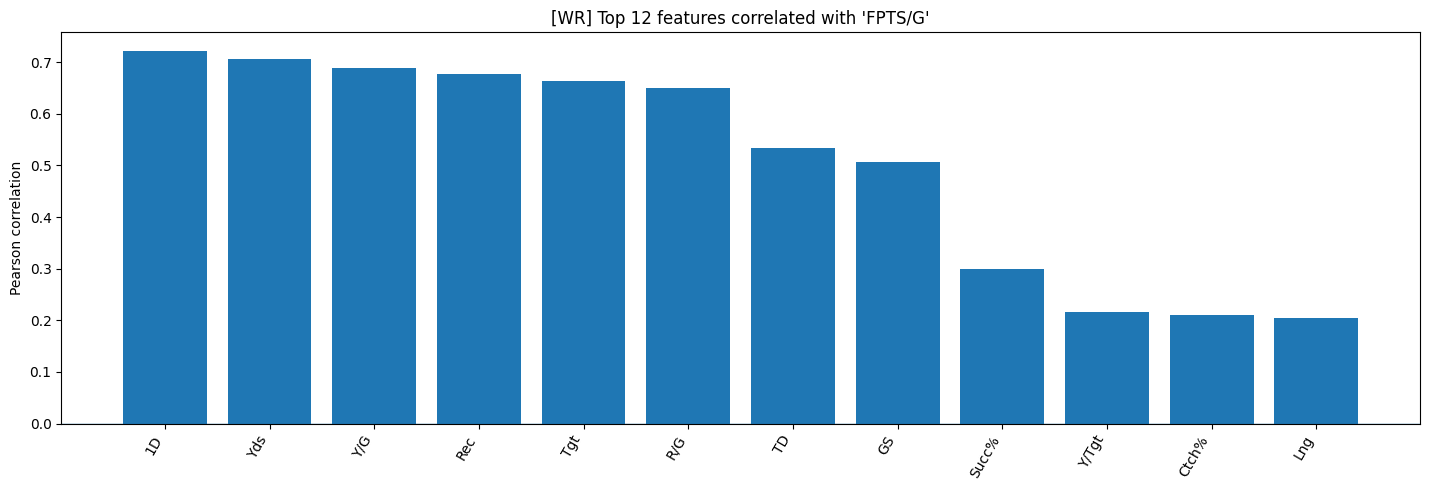


[WR] Top 12 correlations with 'FPTS/G':
feature     corr  abs_corr
     1D 0.721776  0.721776
    Yds 0.706052  0.706052
    Y/G 0.688460  0.688460
    Rec 0.676485  0.676485
    Tgt 0.664181  0.664181
    R/G 0.650119  0.650119
     TD 0.534445  0.534445
     GS 0.505927  0.505927
  Succ% 0.299520  0.299520
  Y/Tgt 0.216174  0.216174
  Ctch% 0.209842  0.209842
    Lng 0.203977  0.203977


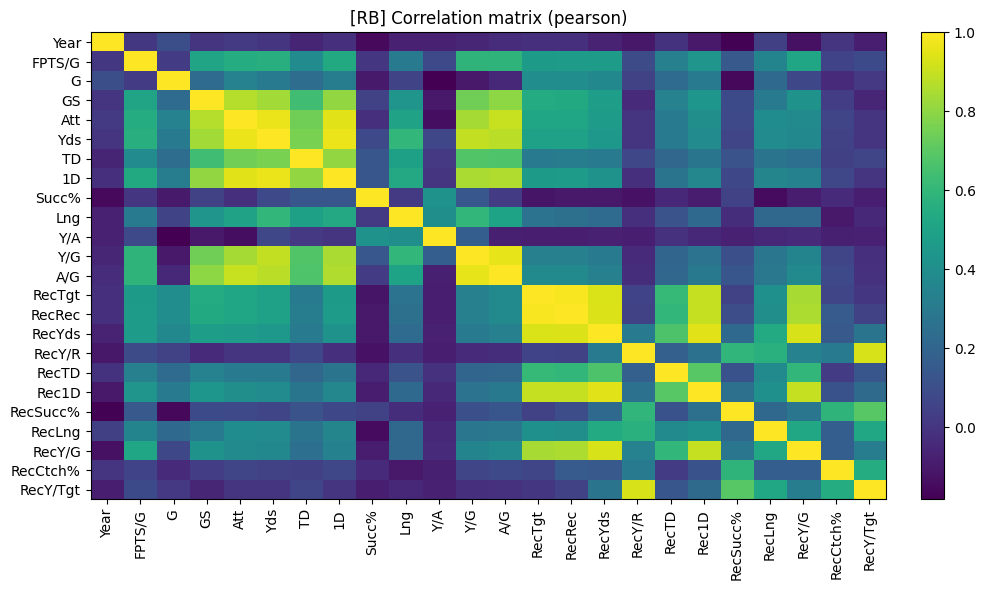

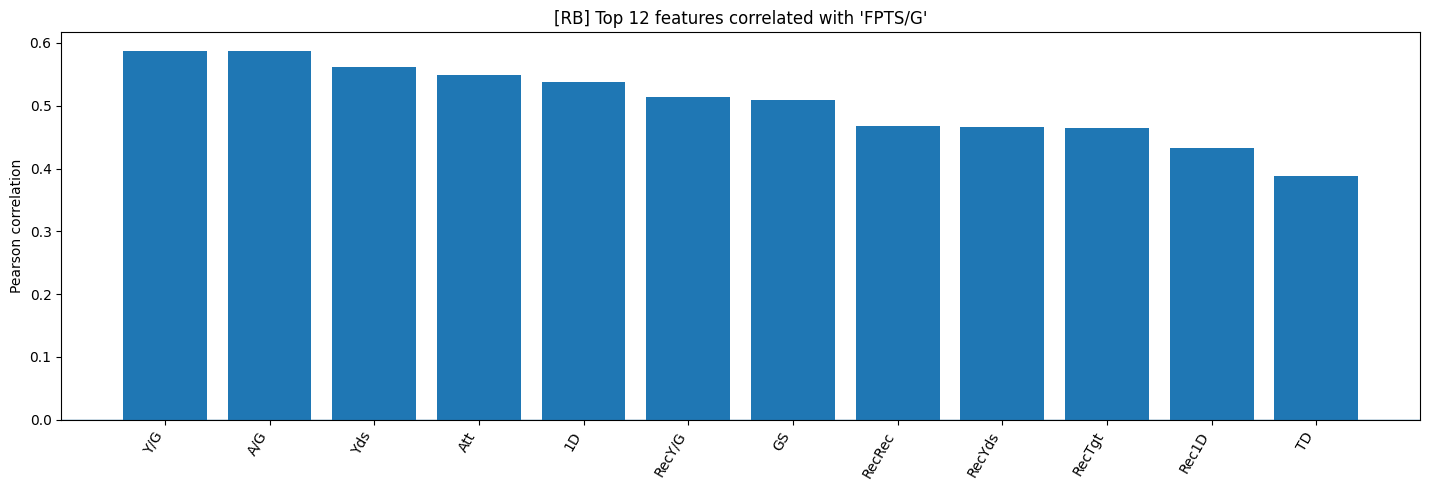


[RB] Top 12 correlations with 'FPTS/G':
feature     corr  abs_corr
    Y/G 0.587411  0.587411
    A/G 0.586506  0.586506
    Yds 0.561189  0.561189
    Att 0.548166  0.548166
     1D 0.537234  0.537234
 RecY/G 0.513256  0.513256
     GS 0.509250  0.509250
 RecRec 0.467705  0.467705
 RecYds 0.466022  0.466022
 RecTgt 0.463917  0.463917
  Rec1D 0.432993  0.432993
     TD 0.388549  0.388549


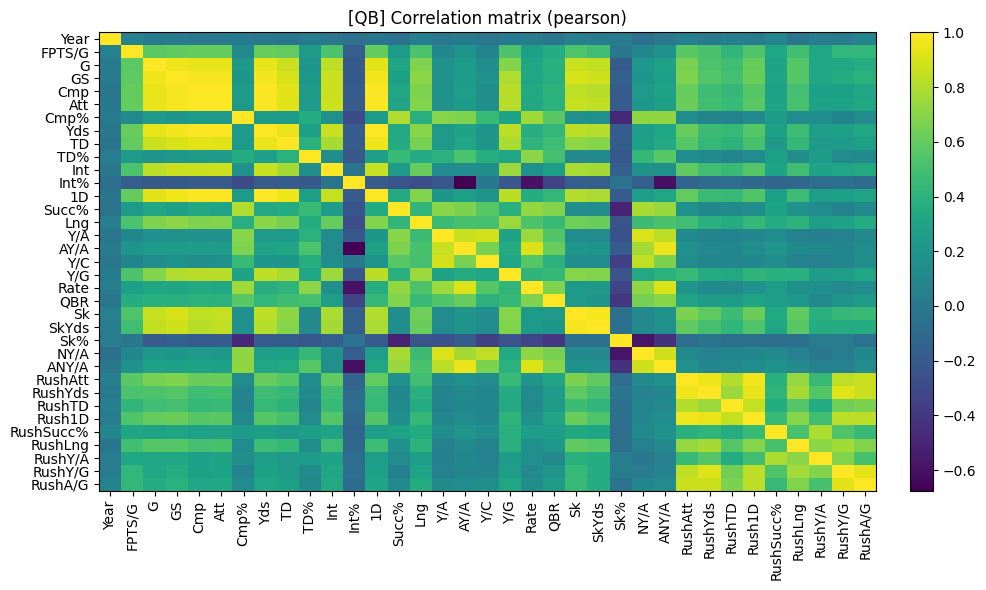

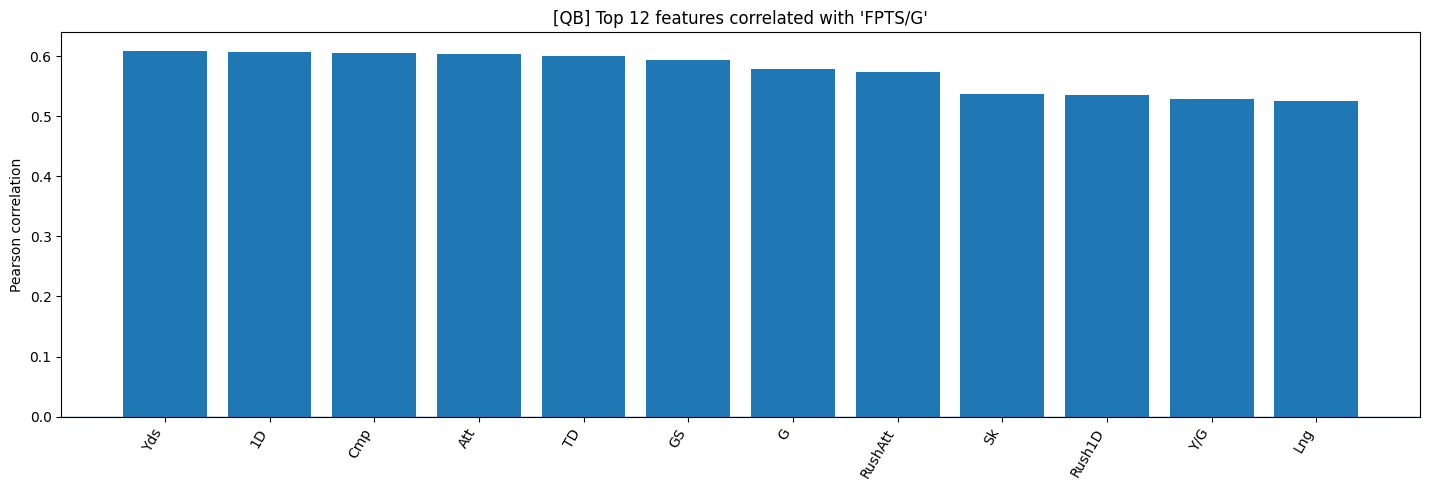


[QB] Top 12 correlations with 'FPTS/G':
feature     corr  abs_corr
    Yds 0.609313  0.609313
     1D 0.606920  0.606920
    Cmp 0.604684  0.604684
    Att 0.603113  0.603113
     TD 0.600115  0.600115
     GS 0.593201  0.593201
      G 0.578399  0.578399
RushAtt 0.573553  0.573553
     Sk 0.536700  0.536700
 Rush1D 0.536275  0.536275
    Y/G 0.529286  0.529286
    Lng 0.526052  0.526052


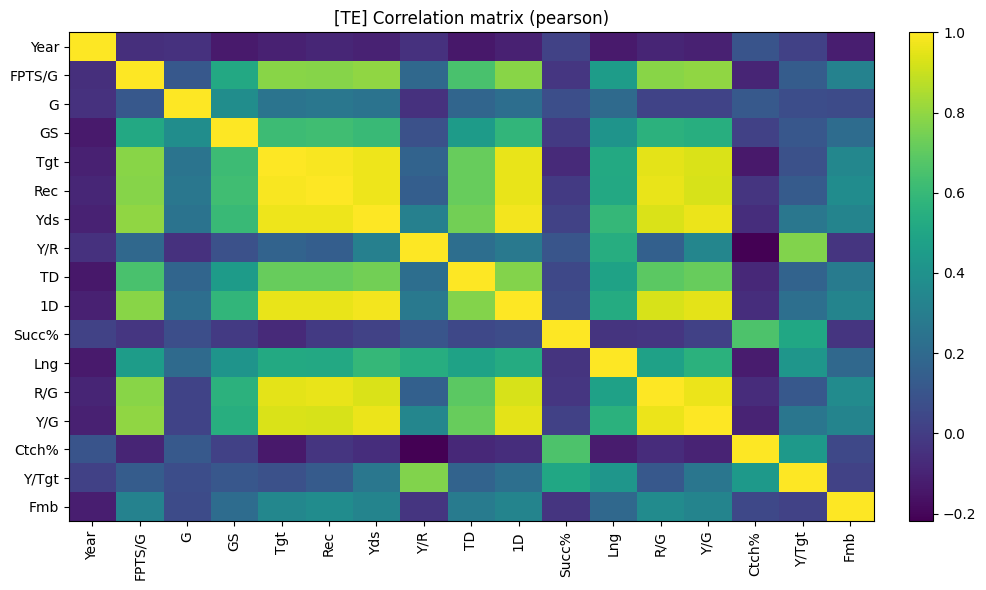

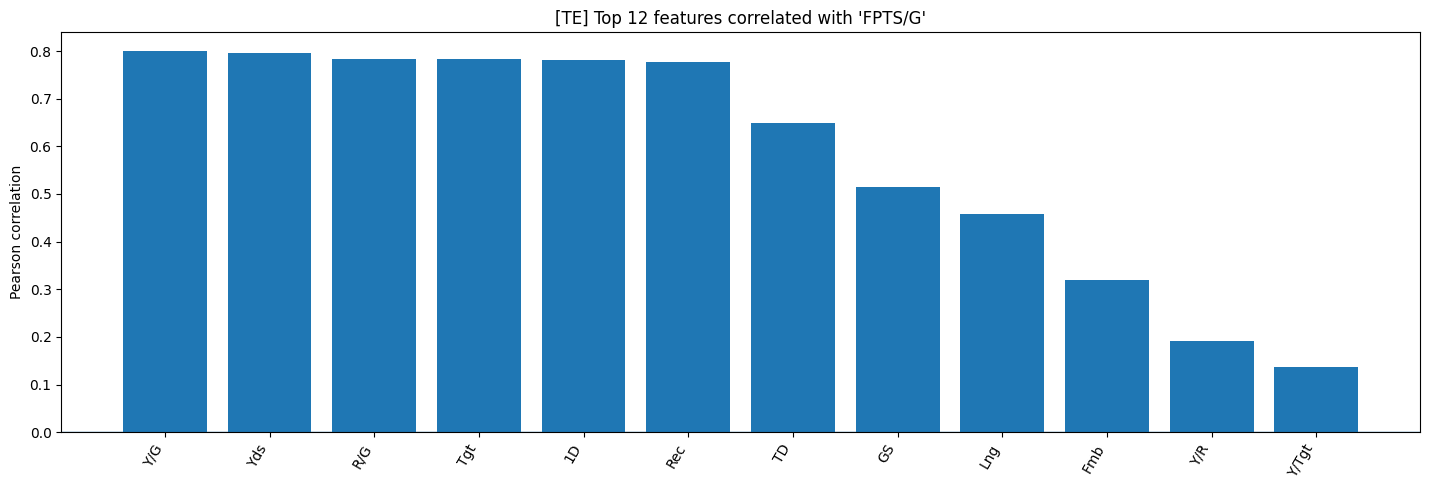


[TE] Top 12 correlations with 'FPTS/G':
feature     corr  abs_corr
    Y/G 0.799356  0.799356
    Yds 0.796081  0.796081
    R/G 0.782857  0.782857
    Tgt 0.782715  0.782715
     1D 0.781645  0.781645
    Rec 0.776896  0.776896
     TD 0.649074  0.649074
     GS 0.515709  0.515709
    Lng 0.456996  0.456996
    Fmb 0.319908  0.319908
    Y/R 0.191300  0.191300
  Y/Tgt 0.136642  0.136642


In [ ]:
results = analyze_correlations(
    {
        "WR": wr_shifted,
        "RB": rb_shifted,
        "QB": qb_shifted,
        "TE": te_shifted
    },
    target="FPTS/G",
    top_n=12,
    method="pearson",
    min_non_na=0.6,
    plot=True
)

WR Model

In [ ]:
X = wr_shifted[wr_features]
y = wr_shifted["FPTS/G"]

X_train = X[wr_shifted["Year"] < 2024]
y_train = y[wr_shifted["Year"] < 2024]

X_test = X[wr_shifted["Year"] == 2024]
y_test = y[wr_shifted["Year"] == 2024]

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(124, 105) (64, 105)
(124,) (64,)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"XGBoost MAE on 2024 predictions: {mae:.2f} FPTS/G")

XGBoost MAE on 2024 predictions: 3.37 FPTS/G


In [ ]:
results = pd.DataFrame({
    "Player": wr_shifted.loc[wr_shifted["Year"] == 2024, "Player"],
    "Actual": y_test,
    "Predicted": y_pred
})
results["Error"] = abs(results["Actual"] - results["Predicted"])
print(results.sort_values("Predicted", ascending=False).head(20))

                  Player  Actual  Predicted     Error
13            Puka Nacua    18.8  21.939474  3.139474
1      Amon-Ra St. Brown    18.6  21.839962  3.239962
11           Tyreek Hill    12.8  20.539537  7.739537
3            CeeDee Lamb    17.6  19.984570  2.384570
23            A.J. Brown    16.7  18.789564  2.089564
19          Keenan Allen    12.3  17.783409  5.483409
15            Mike Evans    17.2  16.260408  0.939592
0          Ja'Marr Chase    23.7  16.076269  7.623731
30         Jaylen Waddle    10.0  15.507813  5.507813
186         Amari Cooper     8.8  15.420851  6.620851
38          Stefon Diggs    15.2  15.156167  0.043833
2       Justin Jefferson    18.7  14.731227  3.968773
21          Nico Collins    17.6  14.620912  2.979088
184        Davante Adams    17.2  14.581483  2.618517
52           Chris Olave     9.6  14.440204  4.840204
20   Michael Pittman Jr.    10.4  14.407910  4.007910
37          Adam Thielen    13.9  14.182025  0.282025
16           Zay Flowers    

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
}
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='neg_mean_absolute_error', cv=3)
grid.fit(X_train, y_train)
print("Best MAE:", -grid.best_score_)

Best MAE: 3.180075815210405


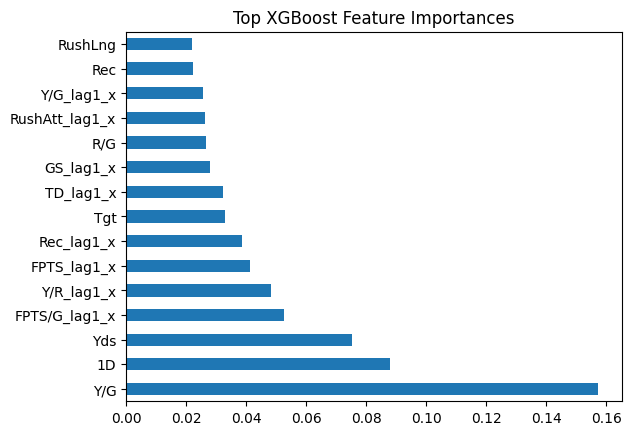

In [ ]:
import matplotlib.pyplot as plt

xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importance.nlargest(15).plot(kind='barh')
plt.title("Top XGBoost Feature Importances")
plt.show()

In [ ]:
X_train_filled = X_train.fillna(-1)
X_test_filled = X_test.fillna(-1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_filled, y_train)

y_pred_rf = rf.predict(X_test_filled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE on 2024 predictions: {mae_rf:.2f} FPTS/G")

Random Forest MAE on 2024 predictions: 3.11 FPTS/G


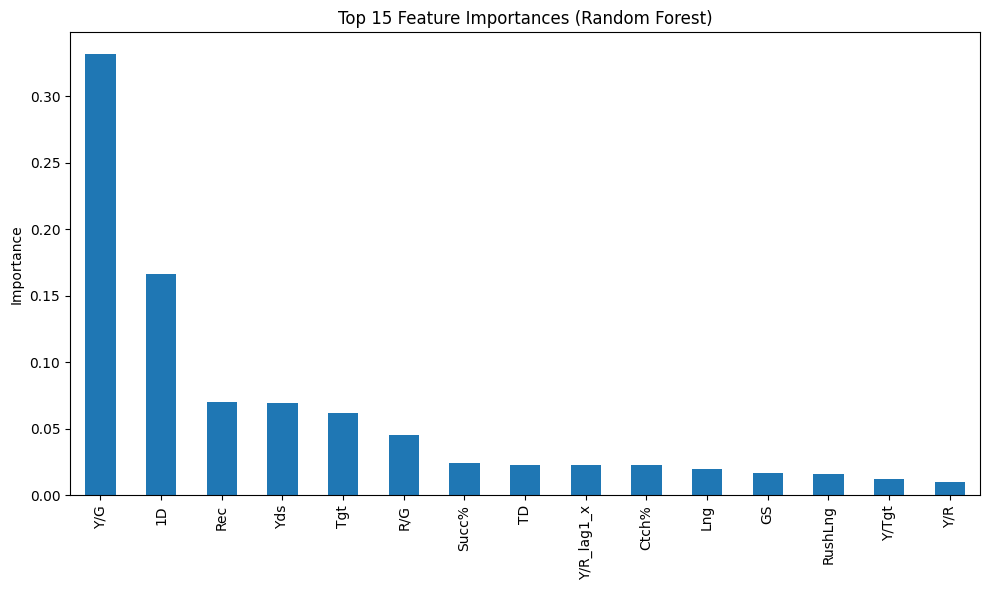

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train_filled.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
rf_results = pd.DataFrame({
    "Player": wr_shifted.loc[wr_shifted["Year"] == 2024, "Player"].values,
    "Actual_FPTS/G": y_test.values,
    "Predicted_FPTS/G": y_pred_rf
})

rf_results["Absolute_Error"] = (rf_results["Actual_FPTS/G"] - rf_results["Predicted_FPTS/G"]).abs()

top_rf = rf_results.sort_values(by="Predicted_FPTS/G", ascending=False)

print(top_rf.head(20))

                 Player  Actual_FPTS/G  Predicted_FPTS/G  Absolute_Error
1     Amon-Ra St. Brown           18.6         21.468333        2.868333
3           CeeDee Lamb           17.6         21.403667        3.803667
11          Tyreek Hill           12.8         20.971000        8.171000
13           Puka Nacua           18.8         20.698333        1.898333
23           A.J. Brown           16.7         19.251000        2.551000
19         Keenan Allen           12.3         16.474333        4.174333
0         Ja'Marr Chase           23.7         16.206667        7.493333
21         Nico Collins           17.6         15.931667        1.668333
15           Mike Evans           17.2         15.828333        1.371667
63         Amari Cooper            8.8         15.368333        6.568333
30        Jaylen Waddle           10.0         15.186667        5.186667
38         Stefon Diggs           15.2         15.000000        0.200000
2      Justin Jefferson           18.7         14.9

In [ ]:
# Create comparison DataFrame
rf_results = pd.DataFrame({
    "Player": wr_shifted.loc[wr_shifted["Year"] == 2024, "Player"].values,
    "Actual_FPTS/G": y_test.values,
    "Predicted_FPTS/G": y_pred_rf
})

rf_results["Error"] = rf_results["Predicted_FPTS/G"] - rf_results["Actual_FPTS/G"]
rf_results["Absolute_Error"] = rf_results["Error"].abs()

rf_results["Performance"] = rf_results["Error"].apply(
    lambda x: "Overperformer" if x < -1 else ("Underperformer" if x > 1 else "On Target")
)

overperformers = rf_results[rf_results["Performance"] == "Overperformer"].sort_values(by="Error")
underperformers = rf_results[rf_results["Performance"] == "Underperformer"].sort_values(by="Error", ascending=False)

# View top 10 of each
print("Top Overperformers:")
print(overperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

print("\nTop Underperformers:")
print(underperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

Top Overperformers:
                Player  Actual_FPTS/G  Predicted_FPTS/G     Error
0        Ja'Marr Chase           23.7         16.206667 -7.493333
17         Tee Higgins           18.5         11.059333 -7.440667
6   Jaxon Smith-Njigba           14.9          7.740667 -7.159333
35        Chris Godwin           19.7         12.685333 -7.014667
31    Jameson Williams           14.1          7.413667 -6.686333
59         Rashee Rice           16.2         10.169333 -6.030667
25      Darnell Mooney           12.1          7.123667 -4.976333
32    Quentin Johnston           11.6          6.788333 -4.811667
14       Khalil Shakir           12.2          7.463667 -4.736333
24         Cooper Kupp           14.6         10.067333 -4.532667

Top Underperformers:
                 Player  Actual_FPTS/G  Predicted_FPTS/G     Error
11          Tyreek Hill           12.8         20.971000  8.171000
63         Amari Cooper            8.8         15.368333  6.568333
36        Tyler Lockett        

QB Model

In [ ]:
X = qb_shifted[qb_features]
y = qb_shifted["FPTS/G"]

X_train = X[qb_shifted["Year"] < 2024]
y_train = y[qb_shifted["Year"] < 2024]
X_test = X[qb_shifted["Year"] == 2024]
y_test = y[qb_shifted["Year"] == 2024]

X_train_filled = X_train.fillna(-1)
X_test_filled = X_test.fillna(-1)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"XGBoost MAE on 2024 predictions: {mae:.2f} FPTS/G")

XGBoost MAE on 2024 predictions: 3.69 FPTS/G


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_filled, y_train)
y_pred_rf = rf.predict(X_test_filled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE on 2024 predictions: {mae_rf:.2f} FPTS/G")

Random Forest MAE on 2024 predictions: 3.71 FPTS/G


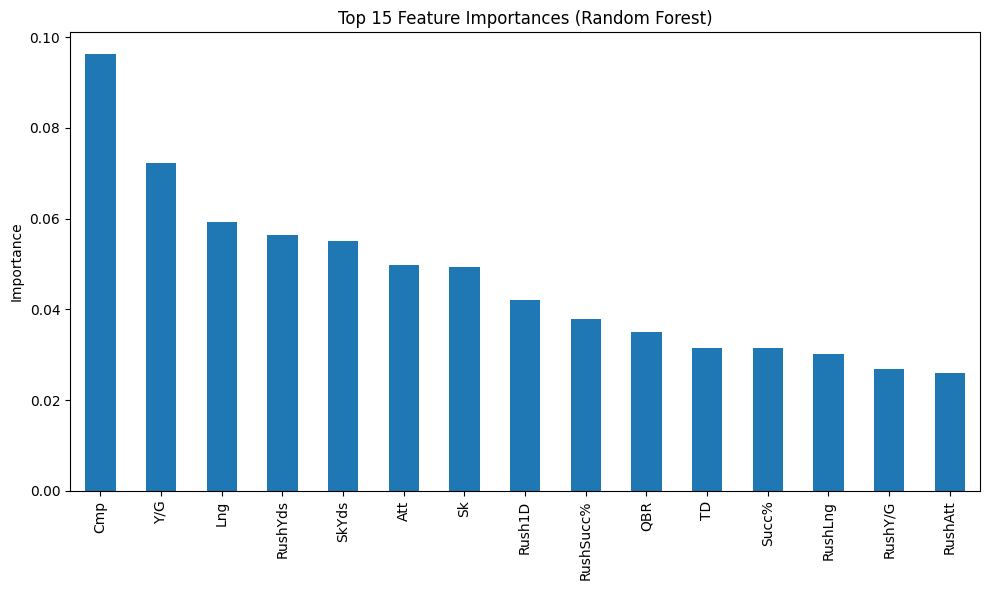

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train_filled.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame({
    "Player": qb_shifted.loc[qb_shifted["Year"] == 2024, "Player"],
    "Actual": y_test.values,
    "Predicted": y_pred_rf,
})
results["Error"] = abs(results["Actual"] - results["Predicted"])
print(results.sort_values("Predicted", ascending=False).head(20))

              Player  Actual  Predicted     Error
12        Josh Allen    22.3  18.716667  3.583333
5      Lamar Jackson    25.3  18.290000  7.010000
6    Patrick Mahomes    17.7  18.004000  0.304000
16       Jalen Hurts    21.0  16.888000  4.112000
24   Trevor Lawrence    14.5  16.480667  1.980667
8     Justin Herbert    16.8  16.462333  0.337667
15       Jordan Love    15.6  16.407667  0.807667
9        Brock Purdy    17.8  16.022000  1.778000
32     Justin Fields    11.9  16.014667  4.114667
2     Baker Mayfield    21.5  15.953333  5.546667
25      Dak Prescott    14.6  15.836667  1.236667
1         Jared Goff    19.1  15.417333  3.682667
13       C.J. Stroud    13.0  15.399333  2.399333
17    Tua Tagovailoa    16.5  15.268667  1.231333
3         Geno Smith    15.6  15.237000  0.363000
14      Kirk Cousins    12.6  14.037000  1.437000
0         Joe Burrow    21.9  13.990000  7.910000
11  Matthew Stafford    13.4  13.784667  0.384667
41      Joshua Dobbs    15.4  13.555000  1.845000


In [ ]:
rf_results = pd.DataFrame({
    "Player": qb_shifted.loc[qb_shifted["Year"] == 2024, "Player"].values,
    "Actual_FPTS/G": y_test.values,
    "Predicted_FPTS/G": y_pred_rf
})

rf_results["Error"] = rf_results["Predicted_FPTS/G"] - rf_results["Actual_FPTS/G"]
rf_results["Absolute_Error"] = rf_results["Error"].abs()

rf_results["Performance"] = rf_results["Error"].apply(
    lambda x: "Overperformer" if x < -1 else ("Underperformer" if x > 1 else "On Target")
)

overperformers = rf_results[rf_results["Performance"] == "Overperformer"].sort_values(by="Error")
underperformers = rf_results[rf_results["Performance"] == "Underperformer"].sort_values(by="Error", ascending=False)

print("Top Overperformers:")
print(overperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

print("\nTop Underperformers:")
print(underperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

Top Overperformers:
             Player  Actual_FPTS/G  Predicted_FPTS/G      Error
4       Sam Darnold           18.1          5.839000 -12.261000
42  Jimmy Garoppolo           19.9          9.525667 -10.374333
7     Aaron Rodgers           15.1          6.746667  -8.353333
0        Joe Burrow           21.9         13.990000  -7.910000
21   Jameis Winston           10.9          3.001667  -7.898333
33        Drew Lock           10.0          2.970667  -7.029333
5     Lamar Jackson           25.3         18.290000  -7.010000
2    Baker Mayfield           21.5         15.953333  -5.546667
40   Marcus Mariota           15.3         10.573667  -4.726333
23     Daniel Jones           13.5          8.860000  -4.640000

Top Underperformers:
                      Player  Actual_FPTS/G  Predicted_FPTS/G     Error
50              Nick Mullens            0.3          9.965333  9.665333
49              Carson Wentz            1.6         10.187333  8.587333
44              Tommy DeVito          

Rb Model

In [ ]:
X = rb_shifted[rb_features]
y = rb_shifted["FPTS/G"]

X_train = X[rb_shifted["Year"] < 2024]
y_train = y[rb_shifted["Year"] < 2024]
X_test = X[rb_shifted["Year"] == 2024]
y_test = y[rb_shifted["Year"] == 2024]

X_train_filled = X_train.fillna(-1)
X_test_filled = X_test.fillna(-1)

In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"XGBoost MAE on 2024 predictions: {mae:.2f} FPTS/G")

XGBoost MAE on 2024 predictions: 3.56 FPTS/G


In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_filled, y_train)
y_pred_rf = rf.predict(X_test_filled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE on 2024 predictions: {mae_rf:.2f} FPTS/G")

Random Forest MAE on 2024 predictions: 3.52 FPTS/G


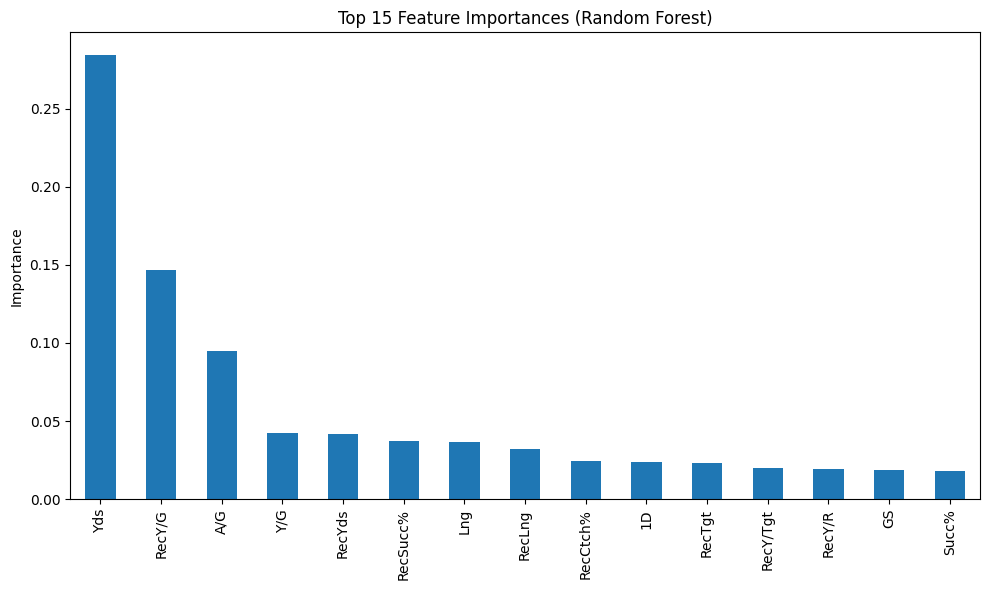

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train_filled.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame({
    "Player": rb_shifted.loc[rb_shifted["Year"] == 2024, "Player"],
    "Actual": y_test.values,
    "Predicted": y_pred_rf,
})
results["Error"] = abs(results["Actual"] - results["Predicted"])
print(results.sort_values("Predicted", ascending=False).head(20))

                  Player  Actual  Predicted     Error
112  Christian McCaffrey    11.9  15.652000  3.752000
86         Rachaad White    12.5  15.345333  2.845333
81    Brian Robinson Jr.    11.4  15.098000  3.698000
75          Alvin Kamara    18.9  14.803000  4.097000
71             Joe Mixon    17.2  14.526333  2.673667
77            James Cook    16.7  14.216667  2.483333
59        Saquon Barkley    22.2  13.685333  8.514667
69          Jahmyr Gibbs    21.3  13.681000  7.619000
64           Josh Jacobs    17.2  13.630667  3.569333
76           Breece Hall    15.1  13.560000  1.540000
78   Rhamondre Stevenson    11.7  13.527333  1.827333
101        Austin Ekeler    11.0  13.396333  2.396333
67           Aaron Jones    14.2  13.389000  0.811000
62        Bijan Robinson    20.1  13.243333  6.856667
95           Jerome Ford     9.6  11.979000  2.379000
100        Isiah Pacheco     8.1  11.938333  3.838333
61        Kyren Williams    17.0  11.687333  5.312667
66          Tony Pollard    

In [ ]:
rf_results = pd.DataFrame({
    "Player": rb_shifted.loc[rb_shifted["Year"] == 2024, "Player"].values,
    "Actual_FPTS/G": y_test.values,
    "Predicted_FPTS/G": y_pred_rf
})

rf_results["Error"] = rf_results["Predicted_FPTS/G"] - rf_results["Actual_FPTS/G"]
rf_results["Absolute_Error"] = rf_results["Error"].abs()

rf_results["Performance"] = rf_results["Error"].apply(
    lambda x: "Overperformer" if x < -1 else ("Underperformer" if x > 1 else "On Target")
)

overperformers = rf_results[rf_results["Performance"] == "Overperformer"].sort_values(by="Error")
underperformers = rf_results[rf_results["Performance"] == "Underperformer"].sort_values(by="Error", ascending=False)

print("Top Overperformers:")
print(overperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

print("\nTop Underperformers:")
print(underperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

Top Overperformers:
              Player  Actual_FPTS/G  Predicted_FPTS/G     Error
1      Derrick Henry           19.8         10.454333 -9.345667
0     Saquon Barkley           22.2         13.685333 -8.514667
15       Chase Brown           15.9          7.635000 -8.265000
10      Jahmyr Gibbs           21.3         13.681000 -7.619000
23  David Montgomery           15.8          8.345000 -7.455000
4    Jonathan Taylor           17.6         10.731667 -6.868333
3     Bijan Robinson           20.1         13.243333 -6.856667
20     De'Von Achane           17.6         11.051667 -6.548333
14       Rico Dowdle           12.4          6.074333 -6.325667
59    Michael Carter           11.9          6.021000 -5.879000

Top Underperformers:
                 Player  Actual_FPTS/G  Predicted_FPTS/G     Error
65        Ronnie Rivers            1.1          7.662000  6.562000
49          Ty Chandler            1.7          8.035000  6.335000
44      Ezekiel Elliott            3.8         10.104

TE Model

In [ ]:
X = te_shifted[te_features]
y = te_shifted["FPTS/G"]

X_train = X[te_shifted["Year"] < 2024]
y_train = y[te_shifted["Year"] < 2024]
X_test = X[te_shifted["Year"] == 2024]
y_test = y[te_shifted["Year"] == 2024]

X_train_filled = X_train.fillna(-1)
X_test_filled = X_test.fillna(-1)

In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"XGBoost MAE on 2024 predictions: {mae:.2f} FPTS/G")

XGBoost MAE on 2024 predictions: 2.05 FPTS/G


In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_filled, y_train)
y_pred_rf = rf.predict(X_test_filled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE on 2024 predictions: {mae_rf:.2f} FPTS/G")

Random Forest MAE on 2024 predictions: 2.01 FPTS/G


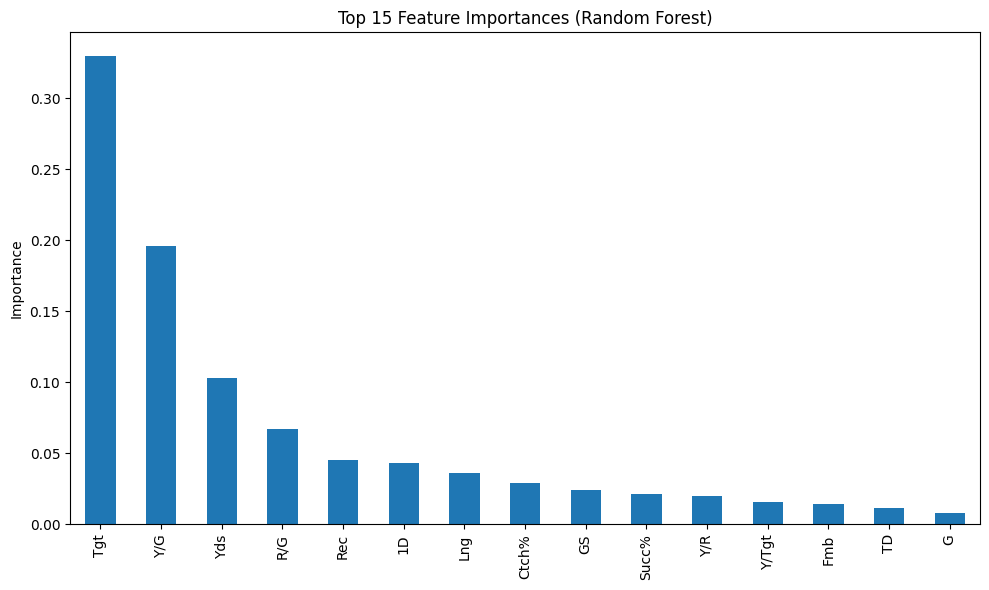

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train_filled.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame({
    "Player": te_shifted.loc[te_shifted["Year"] == 2024, "Player"],
    "Actual": y_test.values,
    "Predicted": y_pred_rf,
})
results["Error"] = abs(results["Actual"] - results["Predicted"])
print(results.sort_values("Predicted", ascending=False).head(20))

            Player  Actual  Predicted     Error
1     Travis Kelce    12.2  13.811667  1.611667
8      David Njoku    13.5  13.804333  0.304333
9      Sam LaPorta    10.9  13.339333  2.439333
19     Evan Engram     9.9  13.137333  3.237333
26  T.J. Hockenson     8.7  12.945000  4.245000
3    George Kittle    15.8  12.700667  3.099333
0     Trey McBride    15.6  11.225667  4.374333
10   Jake Ferguson     7.5  10.847667  3.347667
20       Cole Kmet     7.1  10.093000  2.993000
24  Dallas Goedert    10.4   9.439333  0.960667
23  Dalton Kincaid     7.8   8.852333  1.052333
62  Gerald Everett     0.7   8.747667  8.047667
13  Dalton Schultz     7.0   8.567000  1.567000
12    Mark Andrews    11.1   8.296333  2.803667
21      Kyle Pitts     7.7   8.295333  0.595333
63    Tyler Higbee     8.9   8.209667  0.690333
14   Tyler Conklin     7.6   8.089667  0.489667
2      Jonnu Smith    13.1   8.047000  5.053000
16   Juwan Johnson     7.2   5.865333  1.334667
5     Hunter Henry     9.1   5.435000  3

In [ ]:
rf_results = pd.DataFrame({
    "Player": te_shifted.loc[te_shifted["Year"] == 2024, "Player"].values,
    "Actual_FPTS/G": y_test.values,
    "Predicted_FPTS/G": y_pred_rf
})

rf_results["Error"] = rf_results["Predicted_FPTS/G"] - rf_results["Actual_FPTS/G"]
rf_results["Absolute_Error"] = rf_results["Error"].abs()

rf_results["Performance"] = rf_results["Error"].apply(
    lambda x: "Overperformer" if x < -1 else ("Underperformer" if x > 1 else "On Target")
)

overperformers = rf_results[rf_results["Performance"] == "Overperformer"].sort_values(by="Error")
underperformers = rf_results[rf_results["Performance"] == "Underperformer"].sort_values(by="Error", ascending=False)

print("Top Overperformers:")
print(overperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

print("\nTop Underperformers:")
print(underperformers.head(10)[["Player", "Actual_FPTS/G", "Predicted_FPTS/G", "Error"]])

Top Overperformers:
            Player  Actual_FPTS/G  Predicted_FPTS/G     Error
17    Tucker Kraft            9.6          3.861333 -5.738667
4        Zach Ertz           10.4          4.839333 -5.560667
2      Jonnu Smith           13.1          8.047000 -5.053000
6   Pat Freiermuth            9.9          5.097667 -4.802333
7     Mike Gesicki            8.3          3.505000 -4.795000
11      Cade Otton           10.0          5.390000 -4.610000
0     Trey McBride           15.6         11.225667 -4.374333
15     Will Dissly            7.3          3.246333 -4.053667
5     Hunter Henry            9.1          5.435000 -3.665000
25   Isaiah Likely            7.7          4.315000 -3.385000

Top Underperformers:
            Player  Actual_FPTS/G  Predicted_FPTS/G     Error
62  Gerald Everett            0.7          8.747667  8.047667
26  T.J. Hockenson            8.7         12.945000  4.245000
61   Pharaoh Brown            0.8          4.749667  3.949667
73    Will Mallory          

2025 Predictions

In [ ]:
retired_players = ["Matt Ryan", "Darren Waller", "David Johnson", "Matthew Slater", "DeVante Parker", "Teddy Bridgewater", "Rex Burkhead", "Damien Harris", "Duke Johnson", "Mike Davis", "Corey Coleman", "Rashard Higgins", "Pharoh Cooper", "Mike Williams", "Jonathon Brooks"]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train on all available shifted rows up to 2024
X_train = qb_shifted[qb_shifted["Year"] <= 2024][qb_features].fillna(-1)
y_train = qb_shifted[qb_shifted["Year"] <= 2024]["FPTS/G"]

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

qb_2025_infer = qb[qb["Year"] == 2024].copy()
qb_2025_infer["Year"] = 2025                   # relabel as the next season
qb_2025_infer = qb_2025_infer[~qb_2025_infer["Player"].isin(retired_players)]

X_2025 = qb_2025_infer[qb_features].fillna(-1) # same feature set used in training
qb_2025_infer["Predicted_FPTS/G"] = rf.predict(X_2025)

qb_2025_output = qb_2025_infer[["Player","Team","Pos","Year","Predicted_FPTS/G"]]

In [ ]:
qb_2025_output = qb_2025_output.sort_values(
    by="Predicted_FPTS/G",
    ascending=False
).reset_index(drop=True)

In [ ]:
qb_2025_output.head(30)

,Player,Team,Pos,Year,Predicted_FPTS/G
0,Lamar Jackson,BAL,QB,2025,22.139333
1,Jayden Daniels,WAS,QB,2025,20.324667
2,Kyler Murray,ARI,QB,2025,18.884333
3,Bo Nix,DEN,QB,2025,18.487000
4,Baker Mayfield,TAM,QB,2025,18.375333
5,Josh Allen,BUF,QB,2025,17.367000
6,Joe Burrow,CIN,QB,2025,17.062000
7,Patrick Mahomes,KAN,QB,2025,16.840000
8,Sam Darnold,MIN,QB,2025,16.815000
9,Jared Goff,DET,QB,2025,16.723333


WR

In [ ]:
X_train = wr_shifted[wr_shifted["Year"] <= 2024][wr_features].fillna(-1)
y_train = wr_shifted[wr_shifted["Year"] <= 2024]["FPTS/G"]

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

wr_2025_infer = wr[wr["Year"] == 2024].copy()
wr_2025_infer["Year"] = 2025
wr_2025_infer = wr_2025_infer[~wr_2025_infer["Player"].isin(retired_players)]

X_2025 = wr_2025_infer[wr_features].fillna(-1)
wr_2025_infer["Predicted_FPTS/G"] = rf.predict(X_2025)

wr_2025_output = wr_2025_infer[["Player","Team","Pos","Year","Predicted_FPTS/G"]]

In [ ]:
wr_2025_output = wr_2025_output.sort_values(
    by="Predicted_FPTS/G",
    ascending=False
).reset_index(drop=True)

In [ ]:
wr_2025_output.head(30)

,Player,Team,Pos,Year,Predicted_FPTS/G
0,Ja'Marr Chase,CIN,WR,2025,19.086333
1,Drake London,ATL,WR,2025,19.082667
2,Amon-Ra St. Brown,DET,WR,2025,18.339667
3,Justin Jefferson,MIN,WR,2025,16.700000
4,Puka Nacua,LAR,WR,2025,16.049667
5,A.J. Brown,PHI,WR,2025,15.715000
6,CeeDee Lamb,DAL,WR,2025,15.282333
7,Tyreek Hill,MIA,WR,2025,14.813667
8,Davante Adams,2TM,WR,2025,14.583667
9,Malik Nabers,NYG,WR,2025,14.492000


RB

In [ ]:
X_train = rb_shifted[rb_shifted["Year"] <= 2024][rb_features].fillna(-1)
y_train = rb_shifted[rb_shifted["Year"] <= 2024]["FPTS/G"]

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rb_2025_infer = rb[rb["Year"] == 2024].copy()
rb_2025_infer["Year"] = 2025
rb_2025_infer = rb_2025_infer[~rb_2025_infer["Player"].isin(retired_players)]

X_2025 = rb_2025_infer[rb_features].fillna(-1)
rb_2025_infer["Predicted_FPTS/G"] = rf.predict(X_2025)

rb_2025_output = rb_2025_infer[["Player","Team","Pos","Year","Predicted_FPTS/G"]]

In [ ]:
rb_2025_output = rb_2025_output.sort_values(
    by="Predicted_FPTS/G",
    ascending=False
).reset_index(drop=True)

In [ ]:
rb_2025_output.head(30)

,Player,Team,Pos,Year,Predicted_FPTS/G
0,Alvin Kamara,NOR,RB,2025,17.227000
1,Bucky Irving,TAM,RB,2025,15.548667
2,Joe Mixon,HOU,RB,2025,15.505000
3,Josh Jacobs,GNB,RB,2025,14.900333
4,David Montgomery,DET,RB,2025,14.736667
5,Chase Brown,CIN,RB,2025,14.611000
6,Jahmyr Gibbs,DET,RB,2025,14.567667
7,D'Andre Swift,CHI,RB,2025,14.554333
8,James Conner,ARI,RB,2025,14.486667
9,Aaron Jones,MIN,RB,2025,14.317667


TE

In [ ]:
X_train = te_shifted[te_shifted["Year"] <= 2024][te_features].fillna(-1)
y_train = te_shifted[te_shifted["Year"] <= 2024]["FPTS/G"]

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

te_2025_infer = te[te["Year"] == 2024].copy()
te_2025_infer["Year"] = 2025
te_2025_infer = te_2025_infer[~te_2025_infer["Player"].isin(retired_players)]

X_2025 = te_2025_infer[te_features].fillna(-1)
te_2025_infer["Predicted_FPTS/G"] = rf.predict(X_2025)

te_2025_output = te_2025_infer[["Player","Team","Pos","Year","Predicted_FPTS/G"]]

In [ ]:
te_2025_output = te_2025_output.sort_values(
    by="Predicted_FPTS/G",
    ascending=False
).reset_index(drop=True)

In [ ]:
te_2025_output.head(30)

,Player,Team,Pos,Year,Predicted_FPTS/G
0,Brock Bowers,LVR,TE,2025,13.553667
1,Travis Kelce,KAN,TE,2025,13.133333
2,George Kittle,SFO,TE,2025,12.884333
3,Trey McBride,ARI,TE,2025,12.677000
4,Jonnu Smith,MIA,TE,2025,12.674333
5,Sam LaPorta,DET,TE,2025,10.352667
6,Tucker Kraft,GNB,TE,2025,9.582667
7,David Njoku,CLE,TE,2025,8.926333
8,Dallas Goedert,PHI,TE,2025,8.590667
9,Cade Otton,TAM,TE,2025,8.447667


In [ ]:
all_2025_output = pd.concat(
    [qb_2025_output, wr_2025_output, rb_2025_output, te_2025_output],
    ignore_index=True
)

all_2025_output = all_2025_output.sort_values(
    by="Predicted_FPTS/G",
    ascending=False
).reset_index(drop=True)

all_2025_output["Rank"] = all_2025_output.index + 1

all_2025_output.to_csv("fantasy_2025_predictions.csv", index=False)

In [ ]:
files.download('fantasy_2025_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Weigting Outputs Based on ADP

In [ ]:
adp_df = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning Project /ADP-List.csv')

In [ ]:
# Adjusting Predicted FPTS/G based on Average Draft Positions

def clean_name(s):
    return str(s).strip().replace("\xa0", " ")

# Clean names
all_2025_output["Player"] = all_2025_output["Player"].apply(clean_name)
adp_df["Player"] = adp_df["Player"].apply(clean_name)

# Build ADP rank
if "Rank" in adp_df.columns:
    adp_df["adp_rank"] = adp_df["Rank"]
else:
    adp_df["adp_rank"] = adp_df["ADP"].rank(ascending=True, method="dense")

# Merge ADP and overwrite team name
merged = all_2025_output.merge(
    adp_df[["Player","Team","adp_rank"]],
    on="Player", how="left", suffixes=("","_adp")
)
merged["Team"] = merged["Team_adp"].combine_first(merged["Team"])
merged = merged.drop(columns=["Team_adp"])

# Model rank
merged["model_rank"] = merged["Predicted_FPTS/G"].rank(ascending=False, method="dense")

merged["rank_diff"] = merged["adp_rank"] - merged["model_rank"]

GAP_NON_QB = 4
STEP_NON_QB = 0.10
CAP_NON_QB = 0.30

GAP_QB = 15
STEP_QB = 0.01
CAP_QB = 0.06

GAP_TE = 6
STEP_TE = 0.06
CAP_TE = 0.18

STEP_WINDOW = 5.0

def compute_adj_pct(row):
    diff = row["adp_rank"] - row["model_rank"]
    if pd.isna(diff):
        return 0.0

    if row["Pos"] == "QB":
        gap, step, cap = GAP_QB, STEP_QB, CAP_QB
    elif row["Pos"] == "TE":
        gap, step, cap = GAP_TE, STEP_TE, CAP_TE
    else:
        gap, step, cap = GAP_NON_QB, STEP_NON_QB, CAP_NON_QB

    if abs(diff) <= gap:
        return 0.0

    steps_beyond = (abs(diff) - gap) / STEP_WINDOW
    pct = min(cap, step * steps_beyond)

    return +pct if diff < 0 else -pct

merged["adj_pct"] = merged.apply(compute_adj_pct, axis=1)

merged["Adj_Predicted_FPTS/G"] = merged["Predicted_FPTS/G"] * (1.0 + merged["adj_pct"])

final = merged.sort_values("Adj_Predicted_FPTS/G", ascending=False).reset_index(drop=True)
final["Rank"] = final.index + 1

final.to_csv("fantasy_2025_blended_points.csv", index=False)
print("Saved fantasy_2025_blended_points.csv")

Saved fantasy_2025_blended_points.csv


In [ ]:
for pos in final["Pos"].unique():
    print(f"\nTop 10 {pos}s:")
    top10 = final[final["Pos"] == pos].head(15)
    print(top10[["Rank", "Player", "Team", "Adj_Predicted_FPTS/G"]])


Top 10 QBs:
    Rank           Player  Team  Adj_Predicted_FPTS/G
0      1    Lamar Jackson  BAL              21.962219
2      3   Jayden Daniels  WAS              19.836875
17    18     Kyler Murray  ARI              17.751273
21    22           Bo Nix  DEN              17.377780
22    23       Josh Allen  BUF              17.367000
23    24   Baker Mayfield   TB              17.272813
24    25       Joe Burrow  CIN              16.857256
25    26  Patrick Mahomes   KAN             16.840000
32    33      Sam Darnold  SEA              15.806100
35    36       Jared Goff  DET              15.719933
38    39   Tua Tagovailoa  MIA              15.527547
39    40       Geno Smith   LV              15.482113
41    42      Jalen Hurts  PHI              15.315000
42    43   Justin Herbert  LAC              15.277507
50    51      Brock Purdy   SF              14.799360

Top 10 WRs:
    Rank              Player  Team  Adj_Predicted_FPTS/G
1      2         CeeDee Lamb  DAL              19.867

In [ ]:
files.download('fantasy_2025_blended_points.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final.columns

Index(['Player', 'Team', 'Pos', 'Year', 'Predicted_FPTS/G', 'Rank', 'adp_rank',
       'model_rank', 'rank_diff', 'adj_pct', 'Adj_Predicted_FPTS/G'],
      dtype='object')

In [ ]:
final.drop(columns=['adp_rank', 'model_rank', 'rank_diff', 'adj_pct', 'Predicted_FPTS/G', 'Rank'], inplace=True)

In [ ]:
final = final.copy()
final.head()

,Player,Team,Pos,Year,Adj_Predicted_FPTS/G
0,Lamar Jackson,BAL,QB,2025,21.962219
1,CeeDee Lamb,DAL,WR,2025,19.867033
2,Jayden Daniels,WAS,QB,2025,19.836875
3,Ja'Marr Chase,CIN,WR,2025,19.086333
4,Justin Jefferson,MIN,WR,2025,19.038000


In [ ]:
final["Predicted_FPTS/G"] = final["Adj_Predicted_FPTS/G"]

final = final.drop(columns=["Adj_Predicted_FPTS/G"], errors="ignore")

final = final.sort_values("Predicted_FPTS/G", ascending=False).reset_index(drop=True)

final["Rank"] = final.index + 1

In [ ]:
final.head()

,Player,Team,Pos,Year,Predicted_FPTS/G,Rank
0,Lamar Jackson,BAL,QB,2025,21.962219,1
1,CeeDee Lamb,DAL,WR,2025,19.867033,2
2,Jayden Daniels,WAS,QB,2025,19.836875,3
3,Ja'Marr Chase,CIN,WR,2025,19.086333,4
4,Justin Jefferson,MIN,WR,2025,19.038000,5


In [ ]:
final.to_csv("fantasy_2025_predictions_updated.csv", index=False)

In [ ]:
files.download('fantasy_2025_predictions_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>